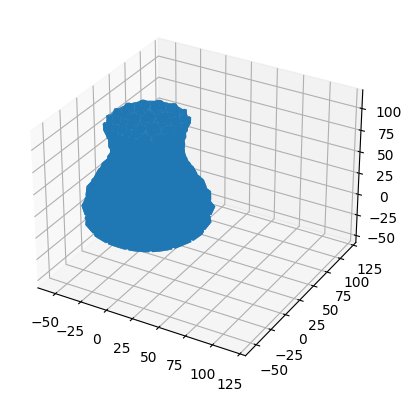

In [76]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('sotvl_thick-Blender.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

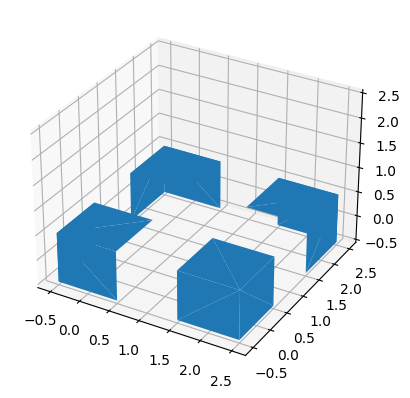

In [77]:
from stl import mesh
import math
import numpy

# Create 3 faces of a cube
data = numpy.zeros(6, dtype=mesh.Mesh.dtype)

# Top of the cube
data['vectors'][0] = numpy.array([[0, 1, 1],
                                  [1, 0, 1],
                                  [0, 0, 1]])
data['vectors'][1] = numpy.array([[1, 0, 1],
                                  [0, 1, 1],
                                  [1, 1, 1]])
# Front face
data['vectors'][2] = numpy.array([[1, 0, 0],
                                  [1, 0, 1],
                                  [1, 1, 0]])
data['vectors'][3] = numpy.array([[1, 1, 1],
                                  [1, 0, 1],
                                  [1, 1, 0]])
# Left face
data['vectors'][4] = numpy.array([[0, 0, 0],
                                  [1, 0, 0],
                                  [1, 0, 1]])
data['vectors'][5] = numpy.array([[0, 0, 0],
                                  [0, 0, 1],
                                  [1, 0, 1]])

# Since the cube faces are from 0 to 1 we can move it to the middle by
# substracting .5
data['vectors'] -= .5

# Generate 4 different meshes so we can rotate them later
meshes = [mesh.Mesh(data.copy()) for _ in range(4)]

# Rotate 90 degrees over the Y axis
meshes[0].rotate([0.0, 0.5, 0.0], math.radians(90))

# Translate 2 points over the X axis
meshes[1].x += 2

# Rotate 90 degrees over the X axis
meshes[2].rotate([0.5, 0.0, 0.0], math.radians(90))
# Translate 2 points over the X and Y points
meshes[2].x += 2
meshes[2].y += 2

# Rotate 90 degrees over the X and Y axis
meshes[3].rotate([0.5, 0.0, 0.0], math.radians(90))
meshes[3].rotate([0.0, 0.5, 0.0], math.radians(90))
# Translate 2 points over the Y axis
meshes[3].y += 2


# Optionally render the rotated cube faces
from matplotlib import pyplot
from mpl_toolkits import mplot3d

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Render the cube faces
for m in meshes:
    axes.add_collection3d(mplot3d.art3d.Poly3DCollection(m.vectors))

# Auto scale to the mesh size
scale = numpy.concatenate([m.points for m in meshes]).flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [78]:
import numpy as np
from stl import mesh

# Define the 8 vertices of the cube
vertices = np.array([\
    [-1, -1, -1],
    [+1, -1, -1],
    [+1, +1, -1],
    [-1, +1, -1],
    [-1, -1, +1],
    [+1, -1, +1],
    [+1, +1, +1],
    [-1, +1, +1]])
# Define the 12 triangles composing the cube
faces = np.array([\
    [0,3,1],
    [1,3,2],
    [0,4,7],
    [0,7,3],
    [4,5,6],
    [4,6,7],
    [5,1,2],
    [5,2,6],
    [2,3,6],
    [3,7,6],
    [0,1,5],
    [0,5,4]])

# Create the mesh
cube = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cube.vectors[i][j] = vertices[f[j],:]

# Write the mesh to file "cube.stl"
cube.save('cube.stl')

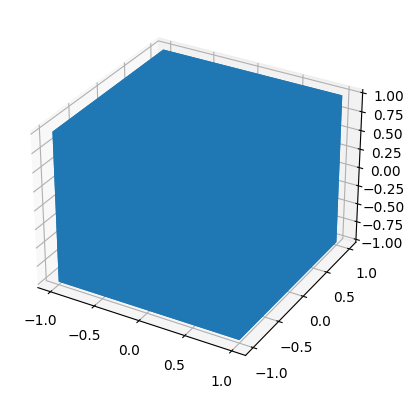

In [79]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('cube.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [80]:
import numpy as np
from stl import mesh

In [81]:
mesh_data = mesh.Mesh.from_file('sotvl_thick-Blender.stl')

In [82]:
min_coords = np.min(mesh_data.vectors.reshape((-1, 3)), axis=0)
max_coords = np.max(mesh_data.vectors.reshape((-1, 3)), axis=0)
x_min, y_min, z_min = min_coords.astype(int)
x_max, y_max, z_max = max_coords.astype(int)

In [83]:
mask = np.zeros((x_max - x_min + 1, y_max - y_min + 1, z_max - z_min + 1), dtype=bool)

In [84]:
for triangle in mesh_data.vectors:
    coords = triangle - [x_min, y_min, z_min]
    coords = coords.astype(int)
    mask[coords[:, 0], coords[:, 1], coords[:, 2]] = True

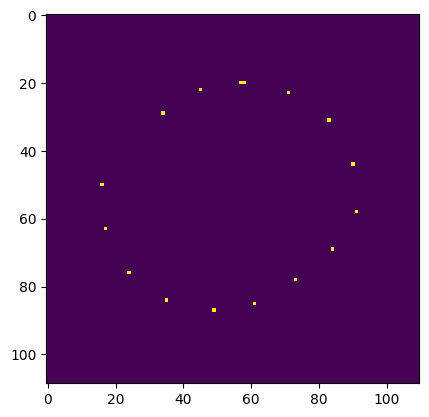

In [85]:
pyplot.imshow(mask[:,:,70])

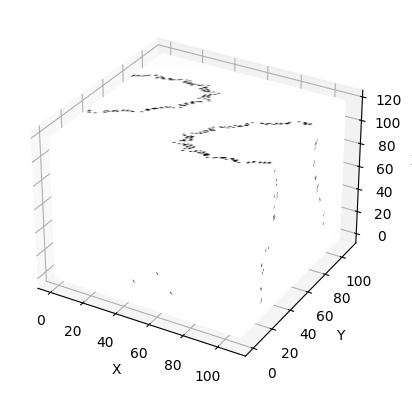

In [62]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some random 3D data
data = mask

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create X, Y, and Z coordinate arrays
x, y, z = np.meshgrid(np.arange(data.shape[0]),
                      np.arange(data.shape[1]),
                      np.arange(data.shape[2]))

# Flatten the coordinate arrays and data
x, y, z, data = x.flatten(), y.flatten(), z.flatten(), data.flatten()

# Create a scatter plot of the data
ax.scatter(x, y, z, c=data, cmap='binary')

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


In [86]:
import vtk
import numpy as np
from vtk.util import numpy_support

# Load the binary mask
mask = mask

# Create a vtkImageData object from the binary mask
vtk_data = vtk.vtkImageData()
vtk_data.SetOrigin(0, 0, 0)
vtk_data.SetDimensions(mask.shape)
vtk_data.SetSpacing(1, 1, 1)
vtk_data.AllocateScalars(vtk.VTK_UNSIGNED_CHAR, 1)
vtk_array = numpy_support.numpy_to_vtk(mask.flatten(), deep=True, array_type=vtk.VTK_UNSIGNED_CHAR)
vtk_data.GetPointData().SetScalars(vtk_array)

# Apply marching cubes algorithm to extract the surface mesh
marching_cubes = vtk.vtkMarchingCubes()
marching_cubes.SetInputData(vtk_data)
marching_cubes.SetValue(0, 1)
marching_cubes.Update()

# Write the mesh to an STL file
writer = vtk.vtkSTLWriter()
writer.SetInputConnection(marching_cubes.GetOutputPort())
writer.SetFileTypeToBinary()
writer.SetFileName('output.stl')
writer.Write()


1

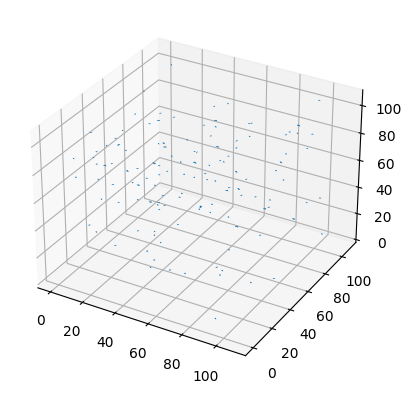

In [87]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('output.stl')
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [95]:
import numpy as np
import pyvista as pv

# Load the STL file
mesh = pv.read('sotvl_thick-Blender.stl')

# Compute the bounding box and voxel size
bounds = list(mesh.bounds)
voxel_size = 0.1
dims = np.ceil((bounds[1::2] - bounds[::2]) / voxel_size).astype(int)

# Create an empty numpy array to store the mask
mask = np.zeros(dims, dtype=bool)

# Create a ray-casting filter to determine inside/outside status
ray_casting = pv.filters.RayCastMapper(voxel_size)

# Loop over each voxel and determine if it's inside or outside the mesh
for i in range(dims[0]):
    for j in range(dims[1]):
        for k in range(dims[2]):
            # Compute the position of the voxel
            pos = bounds[::2] + np.array([i, j, k]) * voxel_size
            
            # Determine the inside/outside status using ray-casting
            inside = ray_casting.is_inside_mesh(pos, mesh)
            
            # Set the corresponding value in the mask
            mask[i, j, k] = inside

# Save the resulting binary mask to a file
np.save('path/to/mask.npy', mask)


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [93]:
!pip install pyvista

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.7 MB/s eta 0:00:00m eta 0:00:010:00:01


In [ ]:
sotvl_thick-Blender